# Water Pollution in Europe Part - II
## Classification for Water Quality

In this project, our goal is to develop and train a machine learning model capable of accurately classifying the water quality index into three categories: Low, Medium, and High. To achieve this, we employ supervised machine learning techniques such as Decision Tree, Support Vector Machine (SVM), K-Nearest Neighbor (KNN), and Multilayer Perceptron (MLP).

## Project Overview:

### Problem Definition

Given chemical parameters in drinking water, can we accurately calculate the water quality index, classify it accordingly, and make accurate predictions using machine learning models?

### Data EDA (Exploratory Data Analysis)

The original data is provided by the[ European Environmental Agency (EEA)](https://www.eea.europa.eu/en).

#### Features

The features consist of chemical elements found in drinking water. The value range is set by the World Health Organization guidelines.

#### Data Dictionary

- **Monitoring Site ID:** Unique identification codes for monitoring locations following ISO standards.
- **Time Sampling Date:** The date of measurement in Year-Month-Day format.
- **Ammonium:** Concentration levels in milligrams per liter of water. Allowed range of Ammonium: 0.25 mg/L to 35 mg/L.
- **Nitrate:** Concentration levels in milligrams per liter of water. Allowed range of Nitrate: 3 mg/L to 50 mg/L.
- **Dissolved Oxygen:** Concentration levels in milligrams per liter of water. Allowed range of Dissolved Oxygen: 4 mg/L to 10 mg/L.
- **Total Nitrogen:** Concentration levels in milligrams per liter of water. Allowed range of Total Nitrogen: 0.5 mg/L to 2 mg/L.
- **Phosphate:** Concentration levels in milligrams per liter of water. Allowed range of Phosphate: 0.075 mg/L to 0.35 mg/L.
- **Total Phosphorus:** Concentration levels in milligrams per liter of water. Allowed range of Total Phosphorus: 0.15 mg/L to 0.7 mg/L.
- **Chlorophyll a:** Concentration levels in milligrams per liter of water. Allowed range of Chlorophyll a: 1 mg/L to 300 mg/L.

### Modeling

We will use the following models for supervised machine learning to achieve our goals:

- Decision Tree
- Support Vector Machine
- K-Nearest Neighbor

### Evaluation

Success will be considered if we can reach a 95% accuracy in predicting the water quality index on the test dataset.

### Final Results

Final results of evaluated metrics for each model.

**Note** The current notebook will focus on the Modeling, Evaluation, and Final Results. For a comprehensive understanding of how the data is processed, please refer to the  [data_preprocessing](data_preprocessing.ipynb) notebook, where we meticulously clean and prepare the dataset for the subsequent stages of our project.


# Modeling

In this phase of the project we will deep dive into the heart of the mission - developing and training machine learning models for the accurate classificaiton of the water quality index into distinct categories: **Low** - (Low level of polution in the water) , **Medium**, and **High** - (high level of popution in the water) that we have calculated in the prevoius part of this project. To accomplish this, we employ a variety of supervised machine learning techniques, including Decision Trees, Support Vector Machines (SVM), K-Nearest Neighbors (KNN), and Multilayer Perceptron (MLP) classifiers.

### Model Selection

1. Decision Tree: Decision trees are a popular choice for classification tasks. They work by recursively splitting the dataset into subsets based on the most significant attribute at each step. This hierarchical structure makes it easy to interpret and visualize the decision-making process.

2. Support Vector Machine (SVM): SVMs are excellent for binary and multi-class classification tasks. They seek to find the hyperplane that best separates different classes while maximizing the margin between them. SVMs can handle high-dimensional data efficiently.

3. K-Nearest Neighbor (KNN): KNN is a simple yet effective classification algorithm. It assigns a class label based on the majority class among its 'k' nearest neighbors. This model is non-parametric and can adapt to different data distributions.

## Import Libary's

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from time import time
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedGroupKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Round all float numbers to 4 numbers after dot

pd.options.display.float_format = '{:,.4f}'.format

## Laod Data
We will load the processed data from the local `data.zip` directory

In [ ]:
train_data = '/content/drive/MyDrive/data/training_dataframe.csv'
test_data = '/content/drive/MyDrive/data/test_dataframe.csv'

In [ ]:
train = pd.read_csv(train_data)
train.head()

,MonitoringSiteID,TimeSamplingDate,Ammonium-mg/L,Nitrate-mg/L,DissolvedOxygen-mg/L,TotalNitrogen-mg/L,Phosphate-mg/L,TotalPhosphorus-mg/L,Chlorophyll-mg/L,WQI
0,IT10GEN1,2016-10-03 00:00:00,1.0000,1.0000,1.0000,3.0000,1.0000,3.0000,1.0000,High
1,IT10TVR7,2016-07-04 00:00:00,1.0000,1.0000,1.0000,3.0000,1.0000,3.0000,1.0000,High
2,ITR110199CH,2016-12-15 00:00:00,1.0000,1.0000,3.0000,1.0000,1.0000,1.0000,1.0000,High
3,ITR110074ACE,2016-06-14 00:00:00,1.0000,1.0000,2.0000,1.0000,1.0000,1.0000,1.0000,Med
4,ITR110074ACE,2016-11-10 00:00:00,1.0000,1.0000,3.0000,1.0000,1.0000,1.0000,1.0000,High


In [ ]:
train.describe()

,Ammonium-mg/L,Nitrate-mg/L,DissolvedOxygen-mg/L,TotalNitrogen-mg/L,Phosphate-mg/L,TotalPhosphorus-mg/L,Chlorophyll-mg/L
count,"2,342,490.0000","2,342,490.0000","2,342,490.0000","2,342,490.0000","2,342,490.0000","2,342,490.0000","2,342,490.0000"
mean,1.0033,1.0028,2.0322,1.4327,1.1288,1.0224,1.0003
std,0.0778,0.0653,0.8619,0.5855,0.3730,0.1804,0.0167
min,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
25%,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
50%,1.0000,1.0000,2.0000,1.0000,1.0000,1.0000,1.0000
75%,1.0000,1.0000,3.0000,2.0000,1.0000,1.0000,1.0000
max,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000


In [ ]:
test = pd.read_csv(test_data)
test.head()

,MonitoringSiteID,TimeSamplingDate,Ammonium-mg/L,Nitrate-mg/L,DissolvedOxygen-mg/L,TotalNitrogen-mg/L,Phosphate-mg/L,TotalPhosphorus-mg/L,Chlorophyll-mg/L,WQI
0,EE12597,2008-09-30 00:00:00,1.0000,1.0000,3.0000,2.0000,1.0000,1.0000,1.0000,High
1,EE11875,2008-08-14 00:00:00,1.0000,1.0000,1.0000,2.0000,1.0000,1.0000,1.0000,Med
2,EE5191,2008-07-29 00:00:00,1.0000,1.0000,3.0000,2.0000,1.0000,1.0000,1.0000,High
3,EE9418,2008-09-18 00:00:00,1.0000,1.0000,3.0000,2.0000,1.0000,1.0000,1.0000,High
4,EEA02,2009-07-01 00:00:00,1.0000,2.0000,2.0000,2.0000,1.0000,1.0000,1.0000,Med


In [ ]:
test.describe()

,Ammonium-mg/L,Nitrate-mg/L,DissolvedOxygen-mg/L,TotalNitrogen-mg/L,Phosphate-mg/L,TotalPhosphorus-mg/L,Chlorophyll-mg/L
count,"8,020.0000","8,020.0000","8,020.0000","8,020.0000","8,020.0000","8,020.0000","8,020.0000"
mean,1.0411,1.1555,2.3206,2.0044,1.0622,1.0446,1.0001
std,0.2839,0.4153,0.7881,0.6669,0.3209,0.2933,0.0112
min,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
25%,1.0000,1.0000,2.0000,2.0000,1.0000,1.0000,1.0000
50%,1.0000,1.0000,3.0000,2.0000,1.0000,1.0000,1.0000
75%,1.0000,1.0000,3.0000,2.0000,1.0000,1.0000,1.0000
max,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,2.0000


## 2.3 Scale the Data

Before saving and using the data for model training and testing, it's crucial to scale the features, especially since the distribution of the data is uneven. Scaling ensures that all features are on a consistent scale, which is fundamental for the proper functioning of many machine learning algorithms.

In this project, we will employ the MinMax Scaler to scale the data. The MinMax Scaler transforms the data in such a way that it falls within the range of [0, 1]. This is particularly useful when dealing with features that have varying ranges, as it helps maintain the relative relationships between values while ensuring that no single feature dominates the others in terms of magnitude. It's an excellent choice for our dataset, considering the uneven distribution of the data.

By using the MinMax Scaler, we ensure that all features contribute equally to the machine learning models, ultimately leading to more accurate and robust water quality classification results.

In [ ]:
features_to_scale = ['Ammonium-mg/L', 'Nitrate-mg/L', 'DissolvedOxygen-mg/L', 'TotalNitrogen-mg/L', 'Phosphate-mg/L', 'TotalPhosphorus-mg/L', 'Chlorophyll-mg/L']

scaler = MinMaxScaler()

# Fit the scaler on the training data
scaler.fit(train[features_to_scale])

# Transform the training data
train[features_to_scale] = scaler.transform(train[features_to_scale])

# Transform the testing data
test[features_to_scale] = scaler.transform(test[features_to_scale])

<ipython-input-200-b41941553e17>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IT[features_to_scale] = scaler.transform(df_IT[features_to_scale])
<ipython-input-200-b41941553e17>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SW[features_to_scale] = scaler.transform(df_SW[features_to_scale])


## 3. Classification Models Default Parameters
In this section, we'll provide an overview of the default parameters for the classification models used in this project. These default settings serve as the baseline configurations for each model before any hyperparameter tuning is performed. Understanding these defaults is crucial for comprehending the initial behavior of the models and their out-of-the-box performance.

### 3.1 Decision Tree
**Default Parameters:**

- Criterion: The default criterion for splitting is usually "gini" or "entropy," depending on the implementation. The criterion determines how the algorithm makes decisions about node splitting.
- Splitter: The splitter can be "best" or "random." It dictates how the algorithm chooses the split at each node.
- Max Depth: By default, the decision tree can grow until all leaves are pure (no misclassifications) or until they contain a minimum number of samples.
- More model paramaters [link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

### 3.2 Support Vector Machine (SVM)
**Default Parameters:**

- Kernel: The default kernel is typically "rbf" (Radial Basis Function), which works well for most cases.
- C (Regularization Parameter): This is typically set to 1.0 by default. It controls the trade-off between maximizing the margin and minimizing the classification error.
- Gamma: The default value for gamma often varies between implementations and depends on the scale of the input data.
- More model paramaters [link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

### 3.3 K-Nearest Neighbor (KNN)
**Default Parameters:**

- Number of Neighbors (k): The default number of neighbors considered for classification is usually set to 5.
- Distance Metric: Euclidean distance is commonly used as the default distance metric, but other metrics such as Manhattan distance can also be used.
- More model paramaters [link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

These default parameters serve as the starting point for our models. In the subsequent sections, we will explore how fine-tuning these parameters can lead to improved classification performance and better alignment with our goal of accurately categorizing water quality into "Low," "Medium," and "High."






In [ ]:
np.random.seed(42)
# split train data
X_train = train.drop(['MonitoringSiteID', 'TimeSamplingDate', 'WQI'], axis=1)
y_train = train['WQI']
print(X_train.shape, y_train.shape)

# split testing data
X_test = test.drop(['MonitoringSiteID', 'TimeSamplingDate', 'WQI'], axis=1)
y_test = test['WQI']
print(X_test.shape, y_test.shape)

(2342490, 7) (2342490,)
(8020, 7) (8020,)


### 3.1 Decesion Tree Model

In [ ]:
# Decesion Tree Model design default parameters

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dt_model_default = DecisionTreeClassifier(random_state=42)
dt_model_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# DT model Score with default parameters

dt_model_default.score(X_test, y_test)

0.8742645456526477

In [ ]:
# Train and Test predictions for evaluation of the model with default parameters

pred_dt_test_default = dt_model_default.predict(X_val)
pred_dt_train_default = dt_model_default.predict(X_train)

In [ ]:
print(classification_report(y_test, pred_dt_test_default))

              precision    recall  f1-score   support

        High       1.00      0.51      0.67      1148
         Low       0.96      1.00      0.98       326
         Med       0.85      1.00      0.91      3115

    accuracy                           0.87      4589
   macro avg       0.94      0.83      0.86      4589
weighted avg       0.89      0.87      0.86      4589



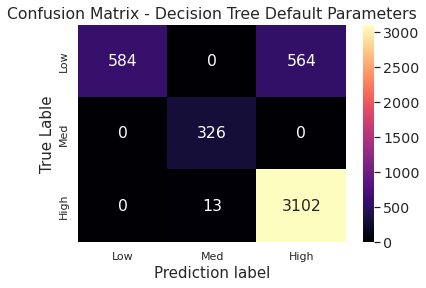

<Figure size 720x504 with 0 Axes>

In [ ]:
# Confusion Matrix DT with default parameters
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, pred_dt_test_default)
matrix_df = pd.DataFrame(confusion_matrix)
ax = plt.axes()
sns.set(font_scale=(1.3))
plt.figure(figsize=(10, 7))
sns.heatmap(matrix_df, annot=True, fmt='g', ax = ax, cmap='magma')
ax.set_title('Confusion Matrix - Decision Tree Default Parameters')
ax.set_xlabel('Prediction label', fontsize=15)
ax.set_xticklabels(''+y_test.unique())
ax.set_yticklabels(list(y_test.unique()))
ax.set_ylabel('True Lable', fontsize=15)
plt.show()

In [ ]:
# Train and Test accuracy scores
pred_train = dt_model_default.predict(X_train)
acc_dt_train = accuracy_score(y_train, pred_train)*100
pred_test = dt_model_default.predict(X_test)
acc_dt_test = accuracy_score(y_test, pred_test)*100
print(f'Decision Tree Classifier accuracy score on training Data with default parametars: {acc_dt_train} ')
print(f'Decision Tree Classifier accuracy score on testing Data with default parametars: {acc_dt_test} ')


Decision Tree Classifier accuracy score on training Data with default parametars: 100.0 
Decision Tree Classifier accuracy score on testing Data with default parametars: 87.42645456526476 


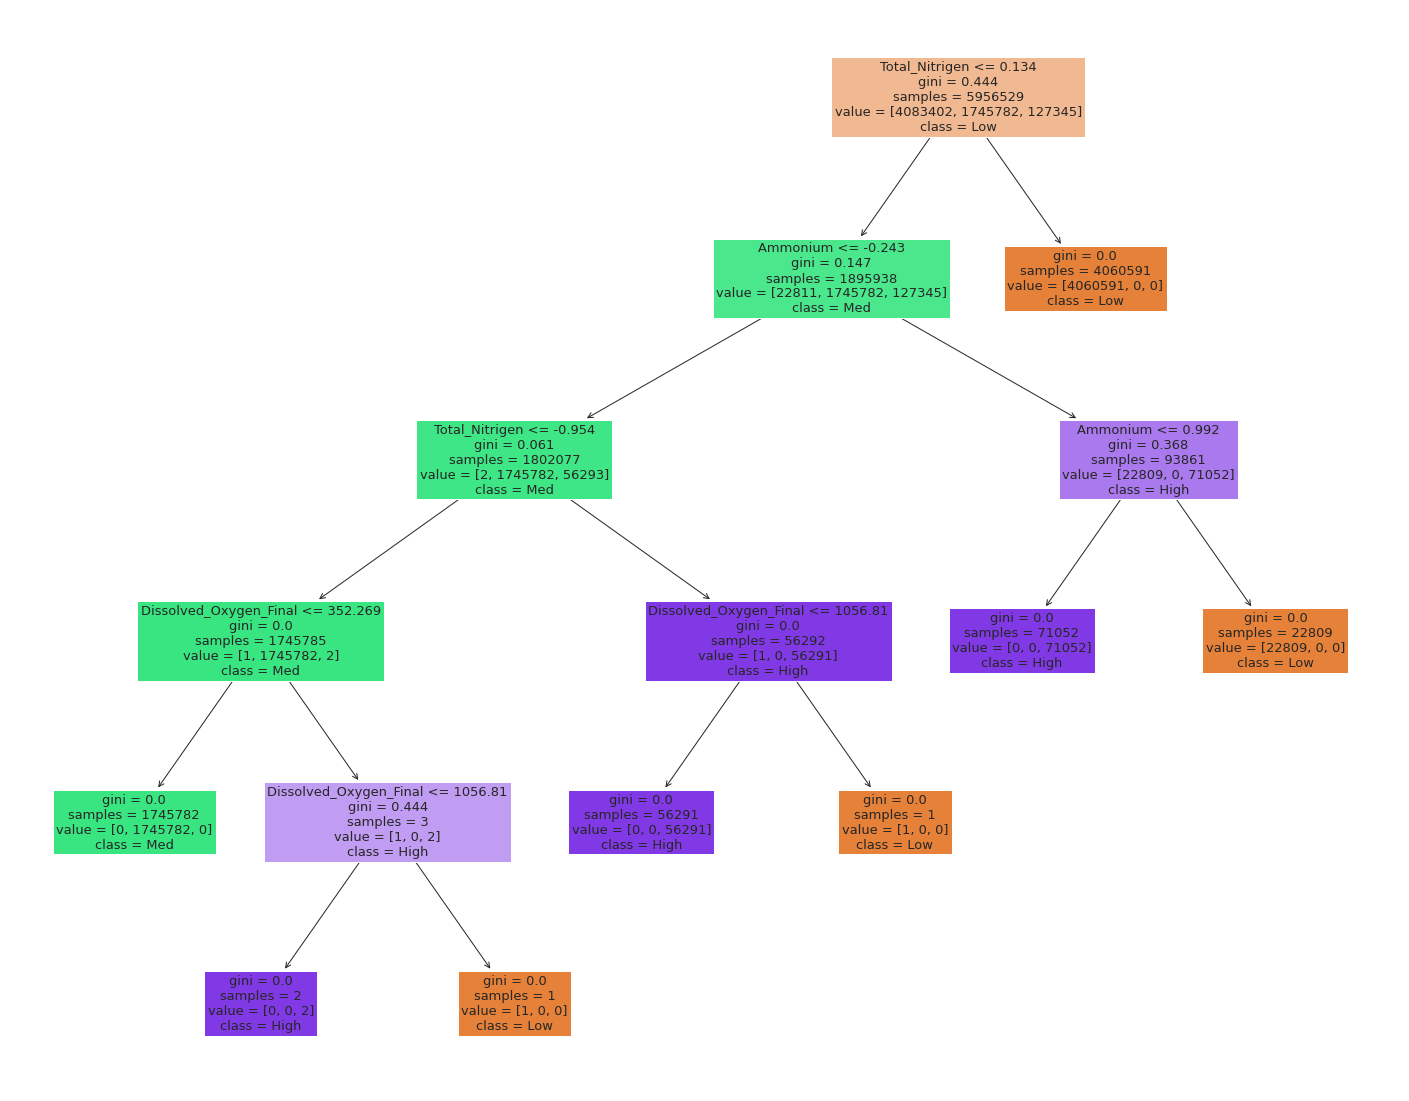

In [ ]:
from sklearn import tree
class_values = ['Low', 'Med', 'High']
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_model_default,
                   feature_names=X_test.columns,
                   class_names=class_values,
                   filled=True)

### 3.2 Support Vector Classifier (SVC) Model

In [ ]:
# SVC Model design with default parameters

from sklearn.svm import SVC, LinearSVC

svc_model_default = SVC(probability=True, random_state=345)
svc_model_default.fit(X_train, y_train)

SVC(probability=True, random_state=345)

In [ ]:
# SVC on score on testing data

svc_model_default.score(X_test, y_test)

0.9843103072564829

In [ ]:
pred_svc_test_default = svc_model_default.predict(X_test)
pred_svc_train_default = svc_model_default.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_svc_test_default))

              precision    recall  f1-score   support

        High       0.96      0.99      0.97      1148
         Low       0.96      1.00      0.98       326
         Med       1.00      0.98      0.99      3115

    accuracy                           0.98      4589
   macro avg       0.97      0.99      0.98      4589
weighted avg       0.98      0.98      0.98      4589



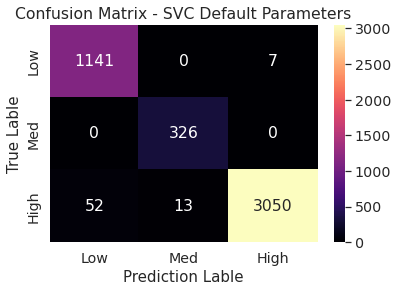

<Figure size 1296x504 with 0 Axes>

In [ ]:
# COnfusion Matrix

confusion_matrix_svc = metrics.confusion_matrix(y_test, pred_svc_test_default)
matrix_df_svc = pd.DataFrame(confusion_matrix_svc)
ax = plt.axes()
sns.set(font_scale=(1.3))
plt.figure(figsize=(18,7))
sns.heatmap(matrix_df_svc, annot=True, fmt='g', ax=ax, cmap='magma')
ax.set_title('Confusion Matrix - SVC Default Parameters')
ax.set_xlabel('Prediction Lable', fontsize=15)
ax.set_xticklabels('' + y_test.unique())
ax.set_yticklabels(list(y_test.unique()))
ax.set_ylabel('True Lable', fontsize=15)
plt.show()

In [ ]:
pred_train = svc_model_default.predict(X_train)
acc_svc_train = accuracy_score(y_train, pred_train)*100
pred_test = svc_model_default.predict(X_test)
acc_svc_test = accuracy_score(y_test, pred_test)*100
print(f'Support Vector Classifier accuracy score on training Data with default parametars: {acc_svc_train} ')
print(f'Support Vector Classifier accuracy score on testing Data with default parametars: {acc_svc_test} ')

Support Vector Classifier accuracy score on training Data with default parametars: 100.0 
Support Vector Classifier accuracy score on testing Data with default parametars: 98.4310307256483 


### 3.3 KNeighbors (KNN) Model

In [ ]:
# KNN Model design with default parameters

from sklearn.neighbors import KNeighborsClassifier

knn_model_default = KNeighborsClassifier()
knn_model_default.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# knn model with default parameters score on testing data

knn_model_default.score(X_test, y_test)

0.9058618435388973

In [ ]:
# Making prediciton with knn model

pred_knn_test = knn_model_default.predict(X_test)

In [ ]:
# Classification report

print(classification_report(y_test, pred_knn_test))

              precision    recall  f1-score   support

        High       1.00      0.64      0.78      1148
         Low       0.96      1.00      0.98       326
         Med       0.88      1.00      0.93      3115

    accuracy                           0.91      4589
   macro avg       0.95      0.88      0.90      4589
weighted avg       0.92      0.91      0.90      4589



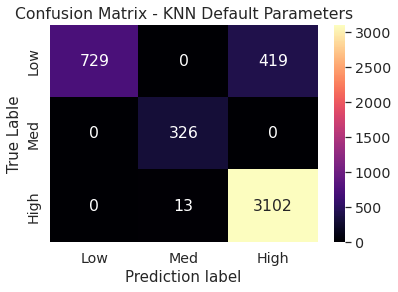

<Figure size 720x504 with 0 Axes>

In [ ]:
# Confusion Matrix KNN

from sklearn import metrics

confusion_matrix_knn = metrics.confusion_matrix(y_test, pred_knn_test)
matrix_df_knn = pd.DataFrame(confusion_matrix_knn)
ax = plt.axes()
sns.set(font_scale=(1.3))
plt.figure(figsize=(10, 7))
sns.heatmap(matrix_df_knn, annot=True, fmt='g', ax = ax, cmap='magma')
ax.set_title('Confusion Matrix - KNN Default Parameters')
ax.set_xlabel('Prediction label', fontsize=15)
ax.set_xticklabels(''+y_test.unique())
ax.set_yticklabels(list(y_test.unique()))
ax.set_ylabel('True Lable', fontsize=15)
plt.show()

In [ ]:
# pred_train = knn_default.predict(X_train_scaled)
# acc_knn_train = accuracy_score(y_train, pred_train)f
pred_test = knn_model_default.predict(X_test)
acc_knn_test = accuracy_score(y_test, pred_test)
print(f'K-Neighbors Classifier accuracy score on testing data with default parametas:  {acc_knn_test}')

K-Neighbors Classifier accuracy score on testing data with default parametas:  0.9058618435388973


## HyperTuning Models Parametars

### 1.Hyper Tune Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
params = dt.get_params()
params_dt = pd.DataFrame(params, index=[0])
params_dt.T

,0
ccp_alpha,0.0000
class_weight,None
criterion,gini
max_depth,None
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0000
min_samples_leaf,1
min_samples_split,2
min_weight_fraction_leaf,0.0000


In [ ]:
# critirion
criterion = ['gini', 'entropy']
# max_depth
max_depth = [2,5,7]
# min_samples_split
min_samples_split = [2,4,6]
# min_samples_leaf
min_samples_leaf = [1,3,5]
#spliter
splitter = ['best', 'random']

In [ ]:
param_grid = {
    'criterion' : criterion,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf,
    'splitter' : splitter,
}
scoring = ['accuracy']
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)

In [ ]:
grid_serach_dt = GridSearchCV(estimator=dt,
                           param_grid=param_grid,
                           scoring=scoring,
                           refit='accuracy',
                           n_jobs=-1,
                           cv=kfold,
                           verbose=0)

grid_result_dt = grid_serach_dt.fit(X_train, y_train)

In [ ]:
grid_result_dt

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=123, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 7], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 6],
                         'splitter': ['best', 'random']},
             refit='accuracy', scoring=['accuracy'])

In [ ]:
print(f'The best hyperparametars are {grid_result_dt.best_params_}')
print(f'The accuracy score for the testing data is:  {grid_result_dt.score(X_test, y_test)}')

The best hyperparametars are {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
The accuracy score for the testing data is:  0.8742645456526477


### 2.Hyper Tune Support Vector Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [ ]:
svc = SVC()
params = svc.get_params()
params_dt = pd.DataFrame(params, index=[0])
params_dt.T

,0
C,1.0000
break_ties,False
cache_size,200
class_weight,None
coef0,0.0000
decision_function_shape,ovr
degree,3
gamma,scale
kernel,rbf
max_iter,-1


In [ ]:
# C parametar for regularization
C_range = [1,3,5]
# kernel type to be used in the algorithm
kernel = ['rbf', 'poly', 'sigmoid']

In [ ]:
param_grid_svc = {
    'C' : C_range,
    'kernel' : kernel
}
scoring = ['accuracy']
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)

In [ ]:
grid_serach_svc = GridSearchCV(estimator=svc,
                           param_grid=param_grid_svc,
                           scoring=scoring,
                           refit='accuracy',
                           n_jobs=-1,
                           cv=kfold,
                           verbose=0)

grid_result_svc = grid_serach_svc.fit(X_train, y_train)

In [ ]:
grid_result_svc

In [ ]:
print(f'The best hyperparametars are {grid_result_svc.best_params_}')
print(f'The accuracy score for the testing data is:  {grid_result_svc.score(X_test, y_train)}')

### 3.Hyper Tune K-Nearest Neighbor Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
params = knn.get_params()
params_dt = pd.DataFrame(params, index=[0])
params_dt.T

In [ ]:
# n_neighbors
n_neighbors = [1,3,5]
# algorithm
algorithm = ['ball_tree', 'kd_tree', 'brute']

In [ ]:
param_grid_knn = {
    'n_neighbors' : n_neighbors,
    'algorithm' : algorithm
}
scoring = ['accuracy']
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)

In [ ]:
grid_serach_knn = GridSearchCV(estimator=knn,
                           param_grid=param_grid_knn,
                           scoring=scoring,
                           refit='accuracy',
                           n_jobs=-1,
                           cv=kfold,
                           verbose=0)

grid_result_knn = grid_serach_knn.fit(X_train, y_train)

In [ ]:
grid_result_knn

In [ ]:
print(f'The best hyperparametars are {grid_result_knn.best_params_}')
print(f'The accuracy score for the testing data is:  {grid_result_knn.score(X_test, y_test)}')

# 5. SUMMARY

In [ ]:
acc_dt_test_tuned = 87.43
acc_svc_test_tuned = 99.65
acc_knn_cross_val_score = 99.65
models = pd.DataFrame({
    'Model' :['Decision Tree', 'SVC', 'K-Neighbor'],
    'Accuracy_score_default' :[acc_dt_test, acc_svc_test, acc_knn_test],
    'Accuracy_score_tuned_parametars' :[acc_dt_test_tuned, acc_svc_test_tuned, acc_knn_cross_val_score],
})
models

,Model,Accuracy_score_default,Accuracy_score_tuned_parametars
0,Decision Tree,87.4265,87.4300
1,SVC,98.4310,99.6500
2,K-Neighbor,90.5862,99.6500
